<h1><center><b><u>Clustering Assigment</u></b></center></h1>


### Overview

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes


After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid

## 1. Reading and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset

country = pd.read_csv("Country.csv", sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Info

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Shape of df

country.shape

(167, 10)

## 2. Cleaning the Data

In [6]:
#checking for duplicates in country column

country.duplicated(subset = ['country'], keep = False).sum()

0

In [7]:
# Checking for null values in any columns

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#Converting the columns from percentage to numerical form

country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [9]:
#Checking the data

country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [10]:
#Checking out outliers for the numerical columns 

country.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


#### As you can see there are ouliers in most of the columns 

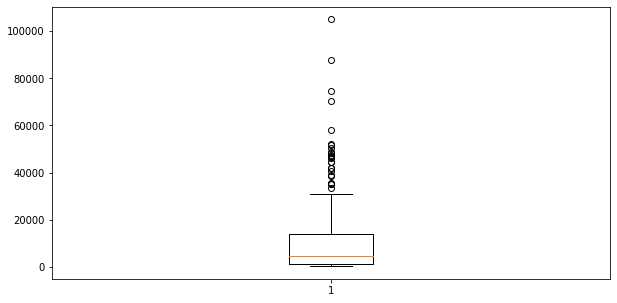

In [11]:
#Plotting to check outliers for gdpp column

plt.figure(figsize=(10,5))
plt.boxplot(country.gdpp)
plt.show()

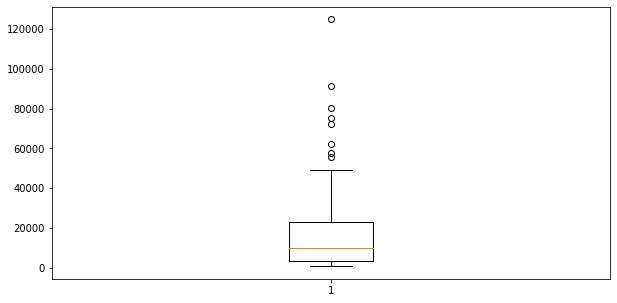

In [12]:
#Plotting to check outliers for income column


plt.figure(figsize=(10,5))
plt.boxplot(country.income)
plt.show()

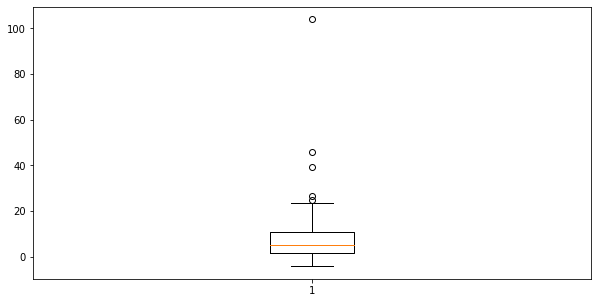

In [13]:
#Plotting to check outliers for inflation column


plt.figure(figsize=(10,5))
plt.boxplot(country.inflation)
plt.show()

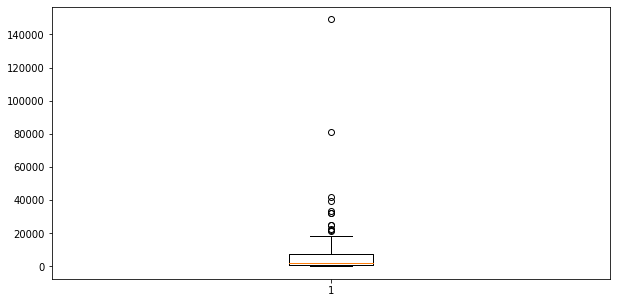

In [14]:
#Plotting to check outliers for imports column


plt.figure(figsize=(10,5))
plt.boxplot(country.imports)
plt.show()

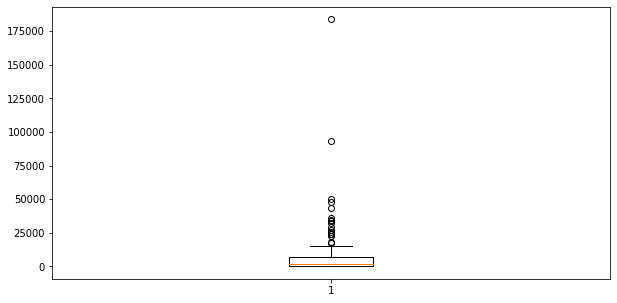

In [15]:
#Plotting to check outliers for exports column


plt.figure(figsize=(10,5))
plt.boxplot(country.exports)
plt.show()

In [16]:
#Checking columns

country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

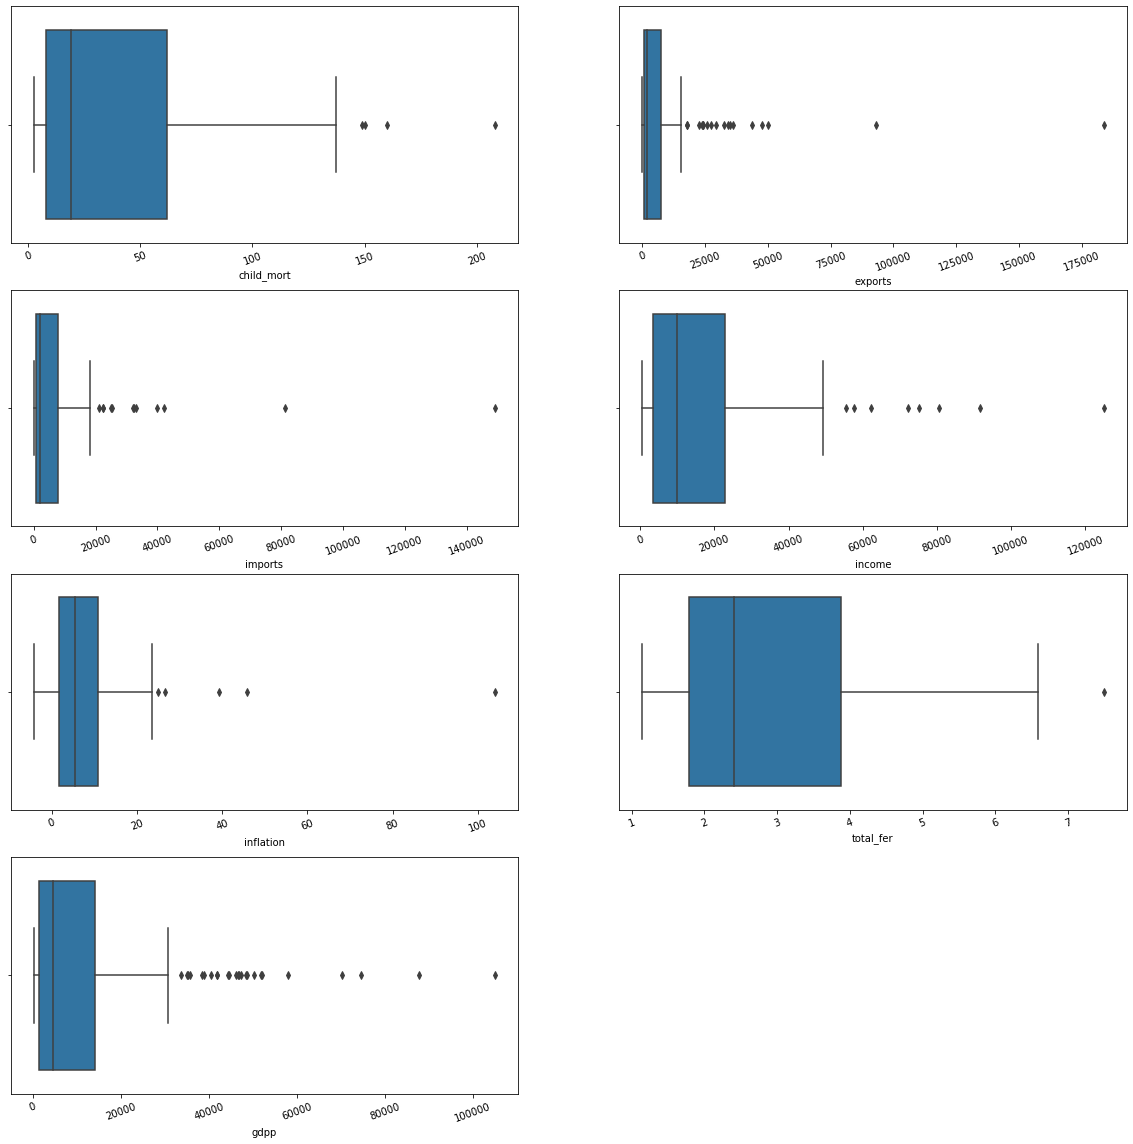

In [17]:
# Plotting boxplots

plt.figure(figsize=(20,20))

features = ['child_mort', 'exports', 'imports', 'income','inflation', 'total_fer', 'gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=country)
    plt.xticks(rotation = 20)  

In [18]:
# Capping the outliers

# Child mortality

Q4 = country['child_mort'].quantile(0.99)
country['child_mort'][country['child_mort'] >= Q4]=Q4

# Exports
Q4 = country['exports'].quantile(0.99)
country['exports'][country['exports'] >= Q4]=Q4

# Imports
Q4 = country['imports'].quantile(0.99)
country['imports'][country['imports'] >= Q4]=Q4

# Income
Q4 = country['income'].quantile(0.99)
country['income'][country['income'] >= Q4]=Q4

# Inflation
Q4 = country['inflation'].quantile(0.99)
country['inflation'][country['inflation'] >= Q4]=Q4

# Total fertility
Q4 = country['total_fer'].quantile(0.99)
country['total_fer'][country['total_fer'] >= Q4]=Q4

# Gdpp
Q4 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp'] >= Q4]=Q4


In [19]:
country.shape

(167, 10)

#### As you can see there are outliers in every columns above

In [20]:
#Checking for the outliers now

country.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.903593,6538.214776,1056.733204,5873.135222,16857.550898,7.380970,70.555689,2.942259,12756.826347
std,39.027880,11415.308590,1801.408906,9422.700869,17957.012855,7.793224,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,151.156000,55136.308400,8410.330400,46629.102600,81883.160000,39.974520,82.370000,6.554624,76125.920000


### Visualising the data

<Figure size 360x360 with 0 Axes>

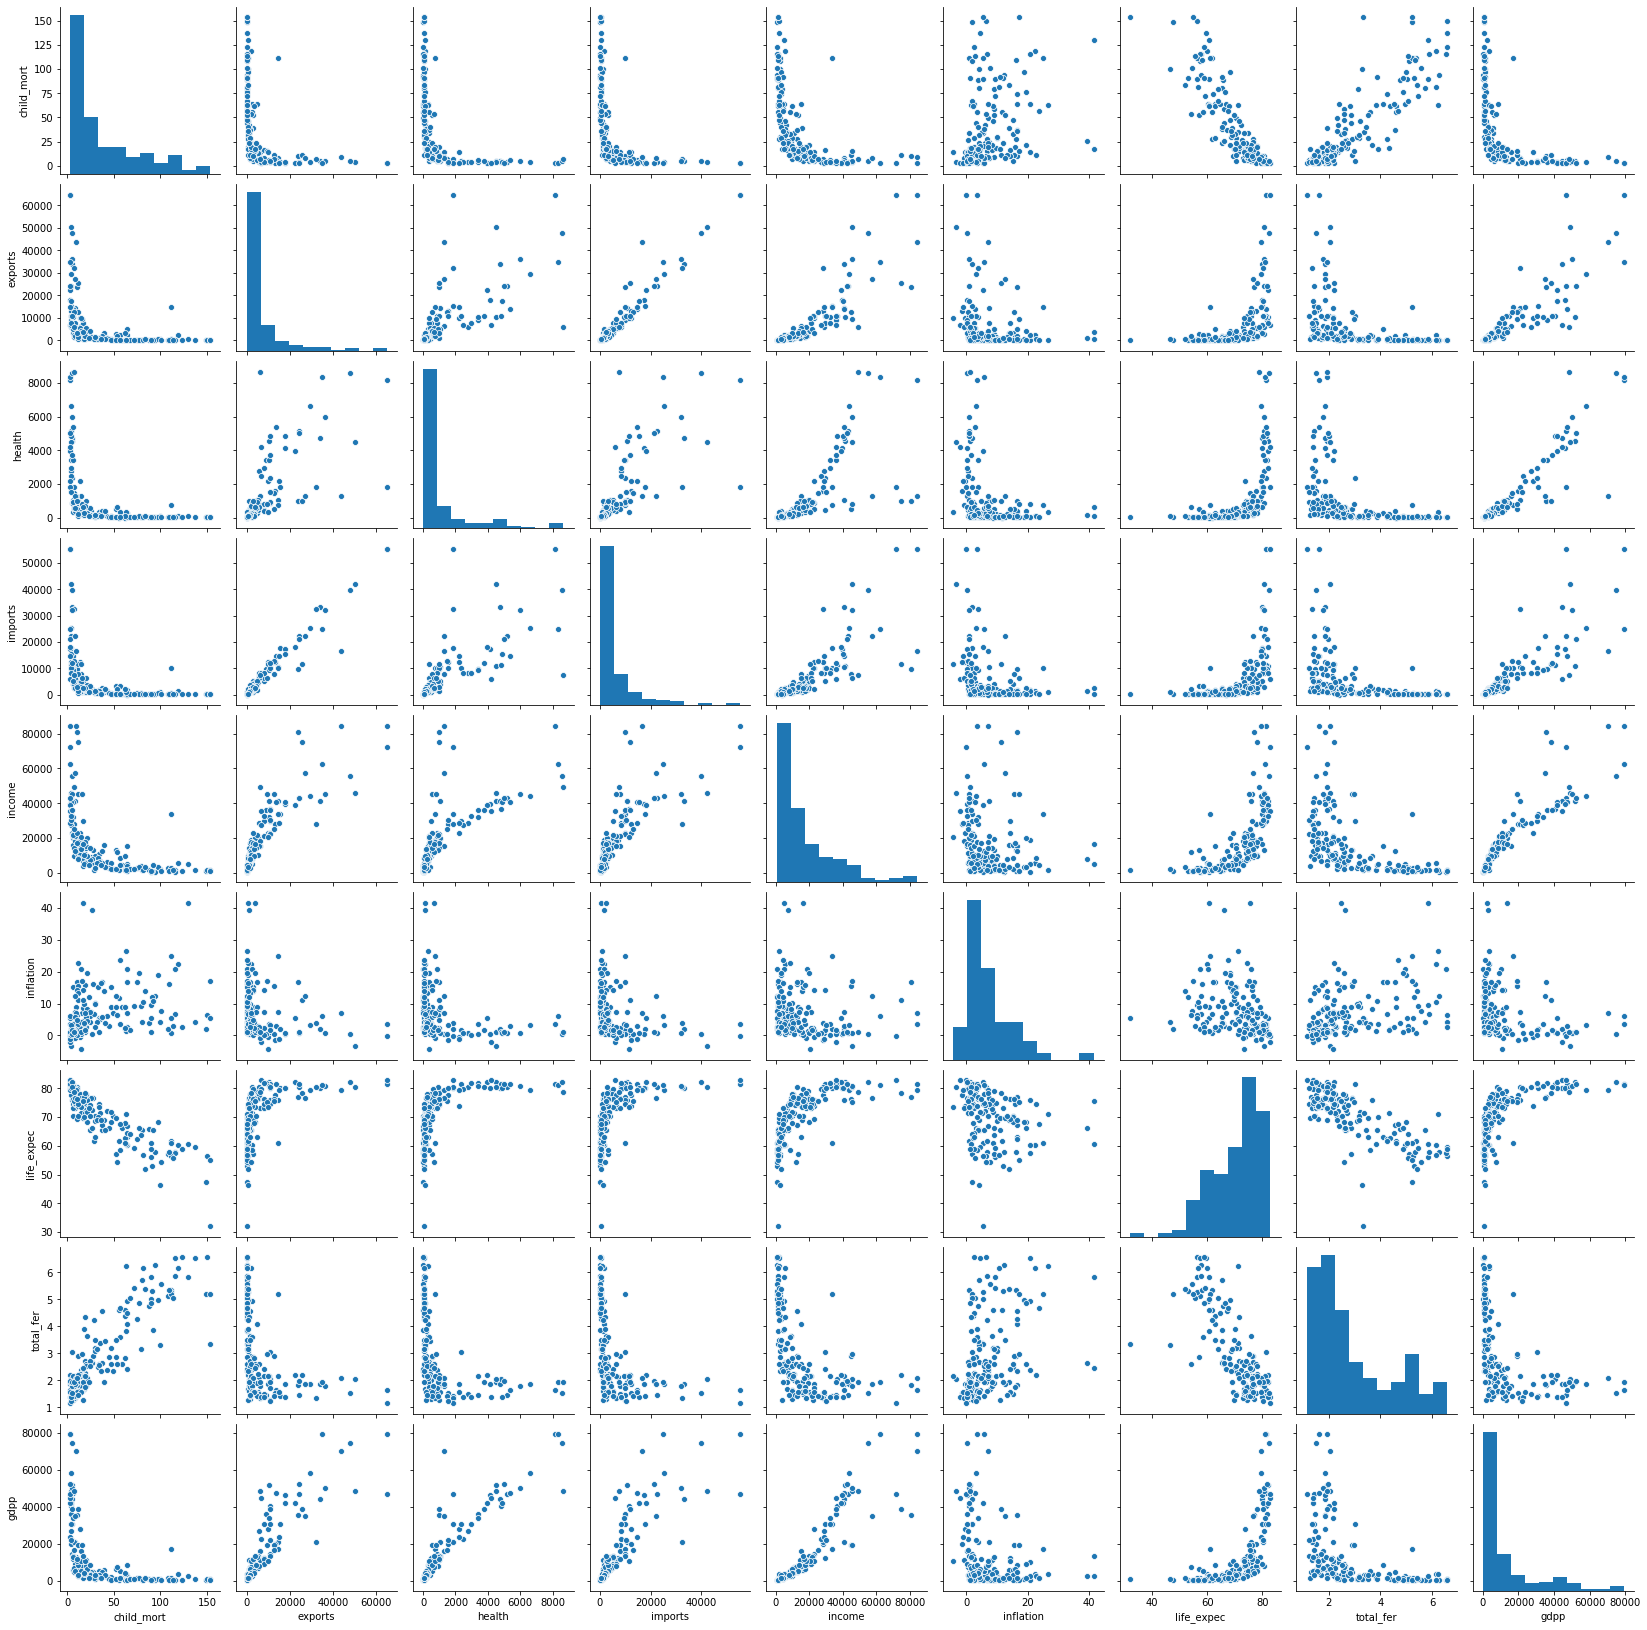

In [21]:
#pairplot of numerical variables

plt.figure(figsize = (5,5))
sns.pairplot(country)
plt.show()

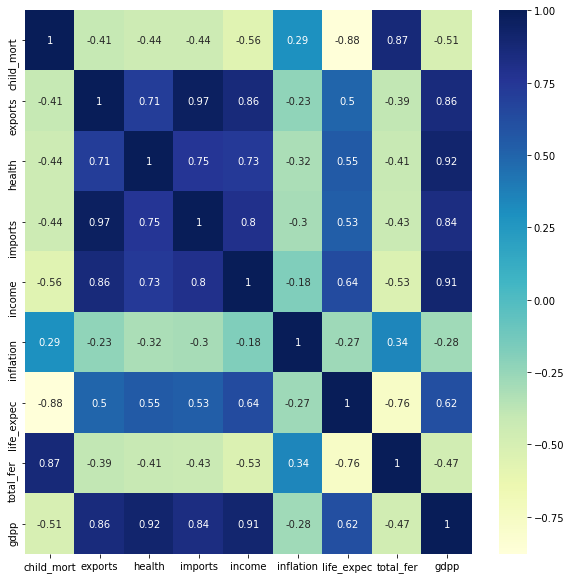

In [22]:
# Let us draw heatmap to understand the corelation better.

plt.figure(figsize = (10,10))  
sns.heatmap(country.corr(),annot = True,cmap="YlGnBu")
plt.show()

In [23]:
#Checking null 

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 3. Prepare the data for modelling

### Clustering

In [24]:
#Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [25]:
#Let's check the Hopkins measure

hopkins(country.drop('country', axis =1))

0.9289302066731551

In [26]:
# Drop the country column again as it is not needed for analysis

country_df =country.drop('country', axis = 1)

In [27]:
country_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0
163,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0
164,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0
165,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0


### Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_df = standard_scaler.fit_transform(country_df)

In [29]:
country_df = pd.DataFrame(country_df)
country_df.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.565040,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.547497,-0.473858,-0.439218,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.484826,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.084159,-0.381249,-0.532363,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178771,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


## 4. Modelling 

### Lets find the optimal number of clusters

#### 1. Silhoutte analysis 

In [30]:
# silhouette analysis
        
for num_clusters in list(range(2,10)):

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46882809604417697
For n_clusters=3, the silhouette score is 0.4049550565492161
For n_clusters=4, the silhouette score is 0.393118398962204
For n_clusters=5, the silhouette score is 0.36732463216744154
For n_clusters=6, the silhouette score is 0.3009491403373441
For n_clusters=7, the silhouette score is 0.3024200967586993
For n_clusters=8, the silhouette score is 0.28419832240953674
For n_clusters=9, the silhouette score is 0.30618829587752117


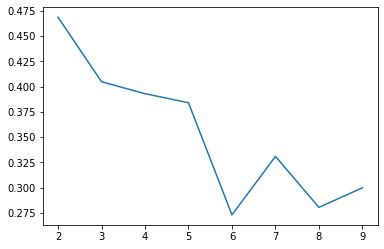

In [31]:
# we'll do the silhouette score graph

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df)
    ss.append([k, silhouette_score(country_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

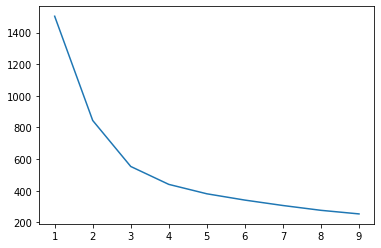

In [32]:
#Now let's proceed to the elbow curve method

ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

#### The optimal cluster is 3, lets make the final model

In [33]:
#Let's perform K means using K=3

kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [34]:
#Labelling 

kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [35]:
# Let's make a copy of our original data before using it for analysis

df_copy = country_df.copy()

In [36]:
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.565040,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.547497,-0.473858,-0.439218,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.484826,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.084159,-0.381249,-0.532363,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178771,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [37]:
# Let's add the cluster Ids to the original data 

country = pd.concat([country.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
country.columns = ['country', 'child_mort', 'exports', 'health', 'imports', 'income',
                      'inflation', 'life_expec', 'total_fer', 'gdpp','cluster_id']
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [38]:
# Cross-check

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [39]:
# Check the count of observation per cluster

country['cluster_id'].value_counts()

0    90
2    48
1    29
Name: cluster_id, dtype: int64

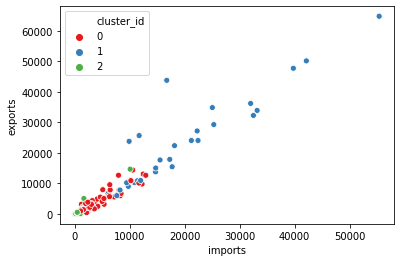

In [40]:
# Plot the Cluster with respect to the clusters obtained 
#Imports vs Exports

sns.scatterplot(x = 'imports', y = 'exports', hue ='cluster_id', legend = 'full', data = country, palette='Set1')
plt.show()

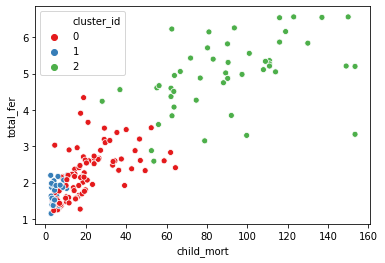

In [41]:
#Child mortality vs Total Fertility

sns.scatterplot(x = 'child_mort', y = 'total_fer', hue ='cluster_id', legend = 'full', data = country, palette='Set1')
plt.show()

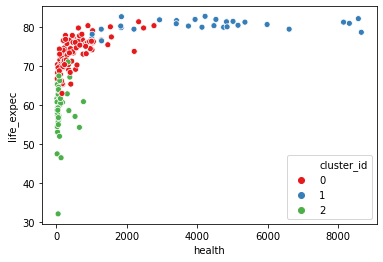

In [42]:
# Health vs Life expectancy

sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_id', legend = 'full', data = country, palette='Set1')
plt.show()

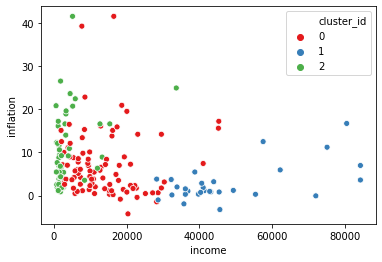

In [43]:
# Income vs Inflation

sns.scatterplot(x = 'income', y = 'inflation', hue ='cluster_id', legend = 'full', data = country, palette='Set1')
plt.show()

## 5. Final analysis

### Clustering Profiling

In [44]:
#Data head

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [45]:
#Grouped by cluster id

country.drop('country', axis = 1).groupby('cluster_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778
1,4.982759,25405.359310,4253.879655,21316.695862,47784.413793,2.876690,80.479310,1.754138,46068.137931
2,90.335417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333


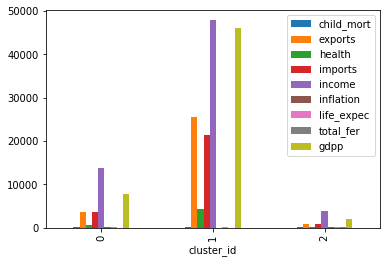

In [46]:
#Plotting  barplot

country.drop('country', axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

### Finding the observations that belong to certain cluster

In [47]:
#Let's use the concept of binning

country_km = country[country['cluster_id']==2]['country']

In [48]:
# Top 10 countries that need aid based on k-means

country_km = country[country['cluster_id']==2].sort_values(by=["gdpp", 'child_mort','income'], ascending=[True, False, True]) 
country_km.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2


## Hierarchical Clustering

In [49]:
#Scaled df head

country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344006,-0.569622,-0.565040,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.547497,-0.473858,-0.439218,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272510,-0.424000,-0.484826,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.084159,-0.381249,-0.532363,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.709406,-0.086742,-0.178771,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [50]:
#Shape of df

country_df.shape

(167, 9)

In [51]:
#Orginal dataframe head

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [52]:
# Shape of df

country.shape

(167, 11)

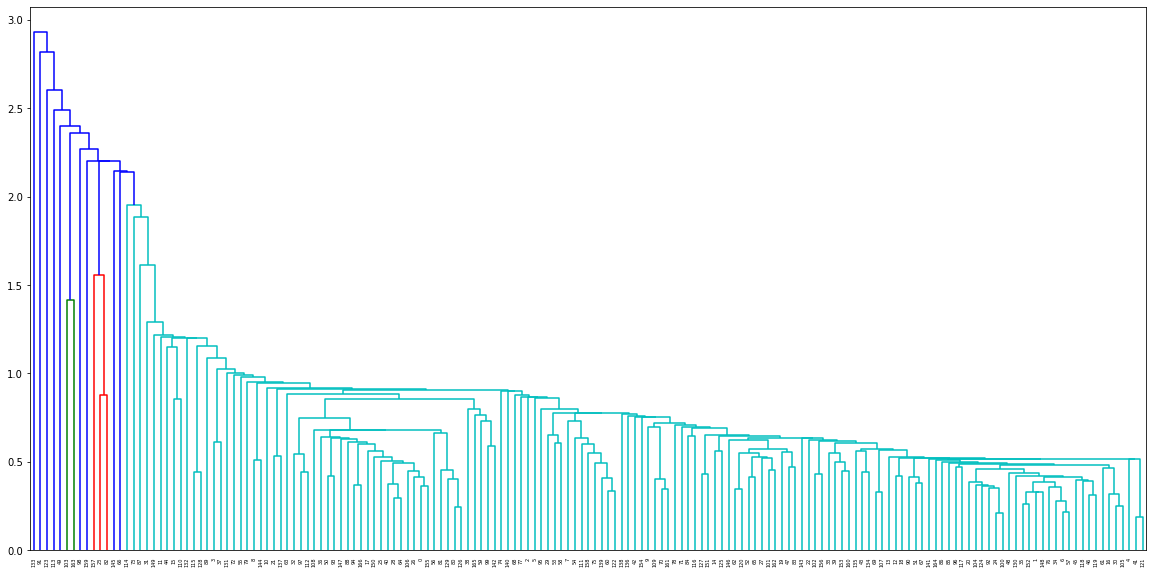

In [53]:
# single linkage

plt.figure(figsize=(20,10))
mergings = linkage(country_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

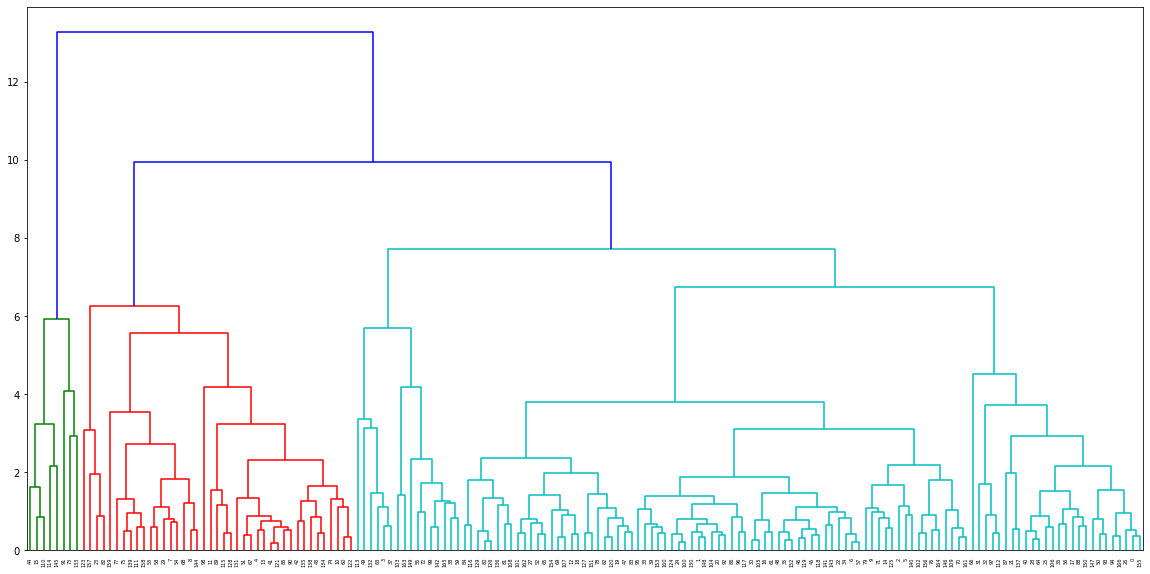

In [54]:
# complete linkage

plt.figure(figsize=(20,10))
mergings = linkage(country_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [56]:
# assign cluster labels

country['cluster_labels'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [57]:
# Cross-check

country.isnull().sum()

country           0
child_mort        0
exports           0
health            0
imports           0
income            0
inflation         0
life_expec        0
total_fer         0
gdpp              0
cluster_id        0
cluster_labels    0
dtype: int64

In [58]:
# Check the count of observation per cluster

country['cluster_labels'].value_counts()

0    118
1     41
2      8
Name: cluster_labels, dtype: int64

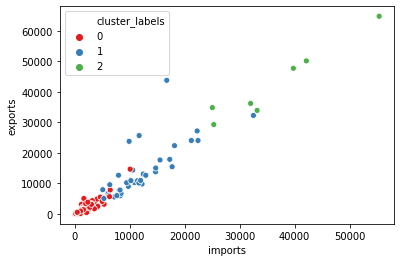

In [59]:
# Plot the Cluster with respect to the clusters obtained 
#Imports vs Exports

sns.scatterplot(x = 'imports', y = 'exports', hue ='cluster_labels', legend = 'full', data = country, palette='Set1')
plt.show()

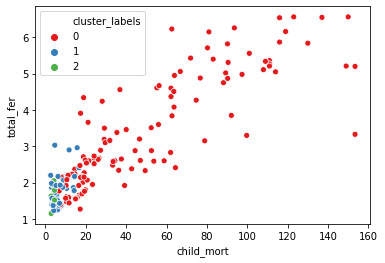

In [60]:
#Child mortality vs Total Fertility

sns.scatterplot(x = 'child_mort', y = 'total_fer', hue ='cluster_labels', legend = 'full', data = country, palette='Set1')
plt.show()

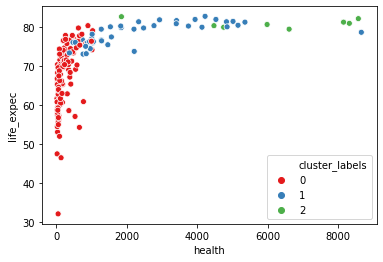

In [61]:
# Health vs Life expectancy

sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = country, palette='Set1')
plt.show()

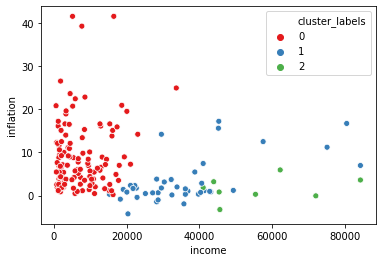

In [62]:
# Income vs Inflation

sns.scatterplot(x = 'income', y = 'inflation', hue ='cluster_labels', legend = 'full', data = country, palette='Set1')
plt.show()

## Final analysis of Hierarchical Clustering

In [63]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [64]:
#Grouping by cluster labels

country.drop('country', axis = 1).groupby('cluster_labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
cluster_labels,,,,,,,,,,
0,50.994068,1466.113115,238.174789,1582.123747,7581.889831,9.187966,67.125424,3.417434,3732.322034,0.813559
1,6.878049,13587.873171,2430.231463,11854.251220,35853.024390,3.313976,78.395122,1.811707,29492.682927,0.512195
2,3.825000,45222.215000,6091.291250,38512.335000,56321.750000,1.571125,80.975000,1.727500,60097.000000,1.000000


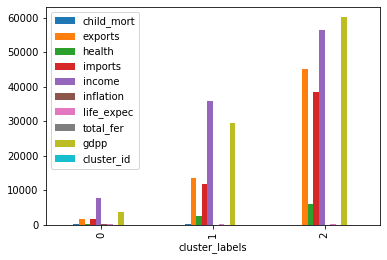

In [65]:
#Plotting  bar

country.drop('country', axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')
plt.show()

### Finding the observations that belong to certain cluster


In [66]:
#Let's use the concept of binning

country_h = country[country['cluster_labels']==0]['country']
country_h

0      Afghanistan
1          Albania
2          Algeria
3           Angola
5        Argentina
          ...     
162        Vanuatu
163      Venezuela
164        Vietnam
165          Yemen
166         Zambia
Name: country, Length: 118, dtype: object

In [67]:
#The top 10 countries based on hierarchial analysis

country_h = country[country['cluster_labels']==0].sort_values(by=["gdpp", 'child_mort','income'], ascending=[True, False, True]) 
country_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2,0
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2,0


<center><h1>  The final top 10 countries who are in direst need of aid are: </h1></center>

In [68]:
Top10 = country_h['country']

In [69]:
Top10.head(10)

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object